# Group Project

Zihao Zhu (zz8658)

Zeyu Li (zl9735)

Sian Cheng (sc65827)

Siyi Liu (sl55394)

Luis Villazon (lrv499)

Yu Xia (yx5293)

## Web Scraping

In [ ]:
# Use this code if using Colab to run Selenium

# Make sure to go to Runtime -> Change runtime and set GPU as hardware accelerator

# !kill -9 -1 # Use this line to delete this VM and start a new one.
# The above line deletes all files and folders from the current VM and allocates a new one.

#Selenium is an open-source tool that automates web browsers.
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
#WebDriver is a browser automation framework that works with open source APIs.
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
#headless means running chrome with chrome.exe
chrome_options.add_argument('--headless')

chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
from IPython.utils import text
wd = webdriver.Chrome(options=chrome_options)
import pandas as pd

### Scraping for each state forum

In [ ]:
forum = pd.DataFrame(columns = ['state', 'num_topics', 'url'])

wd.get('https://www.tripadvisor.com/ListForums-g191-i3-United_States.html')

# /html/body/div[4]/div[2]/div/div[3]/table[2]/tbody/tr[64]/td[1]/a/@href

for i in range(2, 65):
  state = wd.find_element(by=By.XPATH, value = f'/html/body/div[4]/div[2]/div/div[3]/table[2]/tbody/tr[{i}]/td[1]/a').text
  num_topics = wd.find_element(by=By.XPATH, value = f'/html/body/div[4]/div[2]/div/div[3]/table[2]/tbody/tr[{i}]/td[2]').text.replace(",", "")
  if num_topics == 'none':
    num_topics = '0'
  num_topics = int(num_topics)
  url = wd.find_element(by=By.XPATH, value = f'/html/body/div[4]/div[2]/div/div[3]/table[2]/tbody/tr[{i}]/td[1]/a').get_attribute('href')
  forum.loc[len(forum.index)] = [state, num_topics, url]
forum

,state,num_topics,url
0,Alabama,9945,https://www.tripadvisor.com/ShowForum-g28922-i...
1,Alaska,44613,https://www.tripadvisor.com/ShowForum-g28923-i...
2,Arizona,72857,https://www.tripadvisor.com/ShowForum-g28924-i...
3,Arkansas,3484,https://www.tripadvisor.com/ShowForum-g28925-i...
4,California,325034,https://www.tripadvisor.com/ShowForum-g28926-i...
...,...,...,...
58,Virginia,21202,https://www.tripadvisor.com/ShowForum-g28967-i...
59,Washington,43181,https://www.tripadvisor.com/ShowForum-g28968-i...
60,West Virginia,2855,https://www.tripadvisor.com/ShowForum-g28971-i...
61,Wisconsin,11071,https://www.tripadvisor.com/ShowForum-g28972-i...


In [ ]:
usable = forum.loc[forum['num_topics']>500]
usable

,state,num_topics,url
0,Alabama,9945,https://www.tripadvisor.com/ShowForum-g28922-i...
1,Alaska,44613,https://www.tripadvisor.com/ShowForum-g28923-i...
2,Arizona,72857,https://www.tripadvisor.com/ShowForum-g28924-i...
3,Arkansas,3484,https://www.tripadvisor.com/ShowForum-g28925-i...
4,California,325034,https://www.tripadvisor.com/ShowForum-g28926-i...
5,Colorado,58175,https://www.tripadvisor.com/ShowForum-g28927-i...
6,Connecticut,4367,https://www.tripadvisor.com/ShowForum-g28928-i...
7,Delaware,3070,https://www.tripadvisor.com/ShowForum-g28929-i...
8,District of Columbia,37455,https://www.tripadvisor.com/ShowForum-g28969-i...
9,Florida,594128,https://www.tripadvisor.com/ShowForum-g28930-i...


In [ ]:
len(usable)

52

In [ ]:
usable.set_index('state', inplace=True)

In [ ]:
topics = pd.DataFrame(columns = ['state', 'city', 'title', 'num_replies', 'link'])

### Scraping 600 entries from each qualifying state forum

In [ ]:
suff = ['']
for i in range(1, 30):
  suff.append(f'o{i*20}-')
suff

['',
 'o20-',
 'o40-',
 'o60-',
 'o80-',
 'o100-',
 'o120-',
 'o140-',
 'o160-',
 'o180-',
 'o200-',
 'o220-',
 'o240-',
 'o260-',
 'o280-',
 'o300-',
 'o320-',
 'o340-',
 'o360-',
 'o380-',
 'o400-',
 'o420-',
 'o440-',
 'o460-',
 'o480-',
 'o500-',
 'o520-',
 'o540-',
 'o560-',
 'o580-']

In [ ]:
def make_url(splitted, suff):
  splitted[-1] = suff + splitted[-1]
  return '-'.join(splitted)

In [ ]:
root = forum.loc[forum.index[0], 'url']
split = root.split('-')
make_url(split, suff[1])

'https://www.tripadvisor.com/ShowForum-g28922-i173-o20-Alabama.html'

In [ ]:
for i in range(len(usable)):
  root = usable.loc[usable.index[i], 'url']
  split = root.split('-')
  for s in suff:
    try:
      wd.get(make_url(split, s))
      for j in range(2, 25):
        try:
          city = wd.find_element(by=By.XPATH, value = f'/html/body/div[4]/div[2]/div/div[2]/div[2]/div[1]/table/tbody/tr[{j}]/td[2]').text.strip()
          title = wd.find_element(by=By.XPATH, value = f'/html/body/div[4]/div[2]/div/div[2]/div[2]/div[1]/table/tbody/tr[{j}]/td[3]').text.strip().split('\n')[0]
          num_replies = int(wd.find_element(by=By.XPATH, value = f'/html/body/div[4]/div[2]/div/div[2]/div[2]/div[1]/table/tbody/tr[{j}]/td[4]').text.strip().replace(',', ''))
          link = wd.find_element(by=By.XPATH, value = f'/html/body/div[4]/div[2]/div/div[2]/div[2]/div[1]/table/tbody/tr[{j}]/td[3]/b/a').get_attribute('href')
          topics.loc[len(topics.index)] = [usable.index[i], city, title, num_replies, link]
          if len(topics.index+1) % 100 == 0:
            print(f'The {len(topics.index)}th row is:', topics.loc[len(topics.index)-1])
        except:
          continue
    except:
      continue

topics.to_csv('Cities.csv')
!ls
from google.colab import files
files.download("Cities.csv")

### Scraping replies to qualifying topics

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Cities.csv to Cities.csv


In [ ]:
# Use this code if using Colab to run Selenium

# Make sure to go to Runtime -> Change runtime and set GPU as hardware accelerator

# !kill -9 -1 # Use this line to delete this VM and start a new one.
# The above line deletes all files and folders from the current VM and allocates a new one.

#Selenium is an open-source tool that automates web browsers.
!pip install selenium
!apt-get -q update   #Used to handle installation and removal of softwares and libraries
!apt install -yq chromium-chromedriver #ChromeDriver is a separate executable that Selenium WebDriver uses to control Chrome.
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By
#WebDriver is a browser automation framework that works with open source APIs.
#The framework operates by accepting commands, sending those commands to a browser, and interacting with applications.
chrome_options = webdriver.ChromeOptions()
#headless means running chrome with chrome.exe
chrome_options.add_argument('--headless')

chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

from IPython.utils import text
wd = webdriver.Chrome(options=chrome_options)
import pandas as pd

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 22.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.2/400.2 kB 35.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:6 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [109 kB]
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [1,342 kB]
Get:9 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,266 kB]
Hit:10 https://ppa.launchpadcontent.net/deadsnakes/pp

In [ ]:
cities = pd.read_csv('Cities.csv', index_col=0)
cities

,state,city,title,num_replies,link
0,Alabama,Birmingham,First Visit,7,https://www.tripadvisor.com/ShowTopic-g30375-i...
1,Alabama,Alabama,Super Vilitra: The Secret Weapon for a Thrilli...,0,https://www.tripadvisor.com/ShowTopic-g28922-i...
2,Alabama,Prattville,Prattville hotel suggestion,0,https://www.tripadvisor.com/ShowTopic-g30787-i...
3,Alabama,Mobile,Cruise Parking in Mobile,0,https://www.tripadvisor.com/ShowTopic-g30709-i...
4,Alabama,Birmingham,Herring in Birmingham Alabama,2,https://www.tripadvisor.com/ShowTopic-g30375-i...
...,...,...,...,...,...
30595,Wyoming,Yellowstone National Park,Dining at old faithful inn,6,https://www.tripadvisor.com/ShowTopic-g60999-i...
30596,Wyoming,Yellowstone National Park,Beartooth pass suggestions,11,https://www.tripadvisor.com/ShowTopic-g60999-i...
30597,Wyoming,Yellowstone National Park,One-way (Jackson) GTNP to YNP (Bozeman) w/ a r...,9,https://www.tripadvisor.com/ShowTopic-g60999-i...
30598,Wyoming,Wyoming,2 Aussie ladies - Tour or self drive Yellowstone,5,https://www.tripadvisor.com/ShowTopic-g28973-i...


In [ ]:
valid = cities.loc[cities['num_replies'] >= 5]
valid

,state,city,title,num_replies,link
0,Alabama,Birmingham,First Visit,7,https://www.tripadvisor.com/ShowTopic-g30375-i...
7,Alabama,Alabama,Civil Rights Museum with Family - Birmingham+M...,5,https://www.tripadvisor.com/ShowTopic-g28922-i...
10,Alabama,Alabama,Ferry or Drive?,12,https://www.tripadvisor.com/ShowTopic-g28922-i...
12,Alabama,Gulf Shores,Where to eat when flying into Pensacola?,6,https://www.tripadvisor.com/ShowTopic-g30582-i...
18,Alabama,Andalusia,"December in Andalucia, Alabama",8,https://www.tripadvisor.com/ShowTopic-g28992-i...
...,...,...,...,...,...
30592,Wyoming,Yellowstone National Park,Food and raw meat,15,https://www.tripadvisor.com/ShowTopic-g60999-i...
30595,Wyoming,Yellowstone National Park,Dining at old faithful inn,6,https://www.tripadvisor.com/ShowTopic-g60999-i...
30596,Wyoming,Yellowstone National Park,Beartooth pass suggestions,11,https://www.tripadvisor.com/ShowTopic-g60999-i...
30597,Wyoming,Yellowstone National Park,One-way (Jackson) GTNP to YNP (Bozeman) w/ a r...,9,https://www.tripadvisor.com/ShowTopic-g60999-i...


In [ ]:
comment = pd.DataFrame(columns = ['state', 'city', 'title', 'post', 'message'])

In [ ]:
from google.colab import files
for i in range(len(valid.index)):
  url = valid.iloc[i, 4]
  try:
    wd.get(url)
    main = wd.find_elements(by=By.XPATH, value = '/html/body/div[4]/div[2]/div[2]/div[2]/div[2]/div[1]/div[6]/div/div/div[2]/div[1]/div[2]/p')
    fine = list(filter(lambda item: item != "", [p.text for p in main]))
    post = ' '.join(fine)
    for j in range(9, 16):
      try:
        reply = wd.find_elements(by=By.XPATH, value = f'/html/body/div[4]/div[2]/div[2]/div[2]/div[2]/div[1]/div[{j}]/div[2]/div[1]/div[2]/p')
        neat = list(filter(lambda item: item != "", [p.text for p in reply]))
        message = ' '.join(neat)
        comment.loc[len(comment.index)] = [valid.iloc[i, 0], valid.iloc[i, 1], valid.iloc[i, 2], post, message]
        if len(comment.index+1) % 100 == 0:
          print(f'The {len(comment.index)}th row is:', comment.loc[len(comment.index)-1])
        if len(comment.index+1) % 10000 == 0:
          comment.to_csv(f'Comment{len(comment.index+1) // 10000}.csv')
          !ls
          files.download(f'Comment{len(comment.index+1) // 10000}.csv')
      except:
        continue
  except:
    continue
comment.to_csv(f'Comment{len(comment.index+1) // 10000 + 1}.csv')
!ls
files.download(f'Comment{len(comment.index+1) // 10000 + 1}.csv')
# stopped and only saved the first 10000 copies

In [ ]:
valid.reset_index(inplace=True)
valid = valid.drop('index', axis=1)
valid

,state,city,title,num_replies,link
0,Alabama,Birmingham,First Visit,7,https://www.tripadvisor.com/ShowTopic-g30375-i...
1,Alabama,Alabama,Civil Rights Museum with Family - Birmingham+M...,5,https://www.tripadvisor.com/ShowTopic-g28922-i...
2,Alabama,Alabama,Ferry or Drive?,12,https://www.tripadvisor.com/ShowTopic-g28922-i...
3,Alabama,Gulf Shores,Where to eat when flying into Pensacola?,6,https://www.tripadvisor.com/ShowTopic-g30582-i...
4,Alabama,Andalusia,"December in Andalucia, Alabama",8,https://www.tripadvisor.com/ShowTopic-g28992-i...
...,...,...,...,...,...
12669,Wyoming,Yellowstone National Park,Food and raw meat,15,https://www.tripadvisor.com/ShowTopic-g60999-i...
12670,Wyoming,Yellowstone National Park,Dining at old faithful inn,6,https://www.tripadvisor.com/ShowTopic-g60999-i...
12671,Wyoming,Yellowstone National Park,Beartooth pass suggestions,11,https://www.tripadvisor.com/ShowTopic-g60999-i...
12672,Wyoming,Yellowstone National Park,One-way (Jackson) GTNP to YNP (Bozeman) w/ a r...,9,https://www.tripadvisor.com/ShowTopic-g60999-i...


In [ ]:
valid.loc[(valid['state']=='Colorado') & (valid['city']=='Rocky Mountain National Park') & (valid['title']=='Making sure I\'m correct')].index[0]

1428

In [ ]:
valid.iloc[1428]

level_0                                                     1428
state                                                   Colorado
city                                Rocky Mountain National Park
title                                    Making sure I'm correct
num_replies                                                    6
link           https://www.tripadvisor.com/ShowTopic-g143048-...
Name: 1428, dtype: object

In [ ]:
valid.iloc[1429, 1]

'Colorado'

In [ ]:
from google.colab import files
for i in range(1429, len(valid.index)):
  url = valid.iloc[i, 5]
  try:
    wd.get(url)
    main = wd.find_elements(by=By.XPATH, value = '/html/body/div[4]/div[2]/div[2]/div[2]/div[2]/div[1]/div[6]/div/div/div[2]/div[1]/div[2]/p')
    fine = list(filter(lambda item: item != "", [p.text for p in main]))
    post = ' '.join(fine)
    for j in range(9, 16):
      try:
        reply = wd.find_elements(by=By.XPATH, value = f'/html/body/div[4]/div[2]/div[2]/div[2]/div[2]/div[1]/div[{j}]/div[2]/div[1]/div[2]/p')
        neat = list(filter(lambda item: item != "", [p.text for p in reply]))
        message = ' '.join(neat)
        comment.loc[len(comment.index)] = [valid.iloc[i, 1], valid.iloc[i, 2], valid.iloc[i, 3], post, message]
        if len(comment.index+1) % 100 == 0:
          print(f'The {len(comment.index)}th row is:', comment.loc[len(comment.index)-1])
        if len(comment.index+1) % 10000 == 0:
          comment.to_csv(f'Comment{len(comment.index+1) // 10000}.csv')
          comment = pd.DataFrame(columns = ['state', 'city', 'title', 'post', 'message'])
      except:
        continue
  except:
    continue
comment.to_csv(f'Comment{len(comment.index+1) // 10000 + 1}.csv')
# stopped at 40000

In [ ]:
valid.loc[(valid['state']=='North Carolina') & (valid['city']=='Charlotte') & (valid['title']=='Customs from Nassau to RDU connecting in CLT')].index[0]

8571

In [ ]:
valid.iloc[8571, 4]

'https://www.tripadvisor.com/ShowTopic-g49022-i291-k14248993-Customs_from_Nassau_to_RDU_connecting_in_CLT-Charlotte_North_Carolina.html'

In [ ]:
from google.colab import files
n = 5
for i in range(5714, len(valid.index)):
  url = valid.iloc[i, 4]
  try:
    wd.get(url)
    main = wd.find_elements(by=By.XPATH, value = '/html/body/div[4]/div[2]/div[2]/div[2]/div[2]/div[1]/div[6]/div/div/div[2]/div[1]/div[2]/p')
    fine = list(filter(lambda item: item != "", [p.text for p in main]))
    post = ' '.join(fine)
    for j in range(9, 16):
      try:
        reply = wd.find_elements(by=By.XPATH, value = f'/html/body/div[4]/div[2]/div[2]/div[2]/div[2]/div[1]/div[{j}]/div[2]/div[1]/div[2]/p')
        neat = list(filter(lambda item: item != "", [p.text for p in reply]))
        message = ' '.join(neat)
        comment.loc[len(comment.index)] = [valid.iloc[i, 0], valid.iloc[i, 1], valid.iloc[i, 2], post, message]
        if len(comment.index+1) % 100 == 0:
          print(f'The {len(comment.index)}th row is:', comment.loc[len(comment.index)-1])
        if len(comment.index+1) % 10000 == 0:
          comment.to_csv(f'Comment{n}.csv')
          comment = pd.DataFrame(columns = ['state', 'city', 'title', 'post', 'message'])
          n += 1
      except:
        continue
  except:
    continue
comment.to_csv(f'Comment{n + 1}.csv')
# stopped at 60000

In [ ]:
from google.colab import files
n = 7
for i in range(8571, len(valid.index)):
  url = valid.iloc[i, 4]
  try:
    wd.get(url)
    main = wd.find_elements(by=By.XPATH, value = '/html/body/div[4]/div[2]/div[2]/div[2]/div[2]/div[1]/div[6]/div/div/div[2]/div[1]/div[2]/p')
    fine = list(filter(lambda item: item != "", [p.text for p in main]))
    post = ' '.join(fine)
    for j in range(9, 16):
      try:
        reply = wd.find_elements(by=By.XPATH, value = f'/html/body/div[4]/div[2]/div[2]/div[2]/div[2]/div[1]/div[{j}]/div[2]/div[1]/div[2]/p')
        neat = list(filter(lambda item: item != "", [p.text for p in reply]))
        message = ' '.join(neat)
        comment.loc[len(comment.index)] = [valid.iloc[i, 0], valid.iloc[i, 1], valid.iloc[i, 2], post, message]
        if len(comment.index+1) % 100 == 0:
          print(f'The {len(comment.index)}th row is:', comment.loc[len(comment.index)-1])
        if len(comment.index+1) % 10000 == 0:
          comment.to_csv(f'Comment{n}.csv')
          comment = pd.DataFrame(columns = ['state', 'city', 'title', 'post', 'message'])
          n += 1
      except:
        continue
  except:
    continue
comment.to_csv(f'Comment{n + 1}.csv')
# stopped at 80000

In [ ]:
valid.loc[(valid['state']=='Virginia') & (valid['city']=='Virginia') & (valid['title']=='Scenic route from Alexandria to Roanoke (Closed topic)')].index[0]


11428

In [ ]:
from google.colab import files
n = 9
for i in range(11428, len(valid.index)):
  url = valid.iloc[i, 4]
  try:
    wd.get(url)
    main = wd.find_elements(by=By.XPATH, value = '/html/body/div[4]/div[2]/div[2]/div[2]/div[2]/div[1]/div[6]/div/div/div[2]/div[1]/div[2]/p')
    fine = list(filter(lambda item: item != "", [p.text for p in main]))
    post = ' '.join(fine)
    for j in range(9, 16):
      try:
        reply = wd.find_elements(by=By.XPATH, value = f'/html/body/div[4]/div[2]/div[2]/div[2]/div[2]/div[1]/div[{j}]/div[2]/div[1]/div[2]/p')
        neat = list(filter(lambda item: item != "", [p.text for p in reply]))
        message = ' '.join(neat)
        comment.loc[len(comment.index)] = [valid.iloc[i, 0], valid.iloc[i, 1], valid.iloc[i, 2], post, message]
        if len(comment.index+1) % 100 == 0:
          print(f'The {len(comment.index)}th row is:', comment.loc[len(comment.index)-1])
          print(f'Now the {i}th topic among{len(valid.index)}.')
      except:
        continue
  except:
    continue
comment.to_csv(f'Comment9.csv')
files.download('Comment9.csv')

The 100th row is: state                                               Virginia
city                                                Virginia
title      Stay Alert for Children at Bus Stops and Walki...
post       Schools have reopened throughout areas of Virg...
message                                                 Bump
Name: 99, dtype: object
Now the 11442th topic among12674.
The 200th row is: state                                               Virginia
city                                            Williamsburg
title      Nice restaurant for anniversary celebration (C...
post       My wife and I are visiting Williamsburg Octobe...
message    My favorites: Chowning's Tavern (King's Arms m...
Name: 199, dtype: object
Now the 11456th topic among12674.
The 300th row is: state                                               Virginia
city                                          Virginia Beach
title      Old School Hotels that aren't a dump? (Closed ...
post       By any chance are there a

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Tidying and cleaning

In [ ]:
all = pd.DataFrame(columns = ['state', 'city', 'title', 'post', 'message'])
columns_to_include = ['state', 'city', 'title', 'post', 'message']
for i in range(1, 10):
  new = pd.read_csv(f'Comment{i}.csv', usecols=columns_to_include)
  all = pd.concat([all, new], axis=0, ignore_index=True)
all

,state,city,title,post,message
0,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,"For higher end: Highlands Bar & Grill, Bottega..."
1,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,This is awesome! Thank you!
2,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,dbh2- great list! My daughter used to live in ...
3,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,Tripadvisor staff removed this post because it...
4,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,There is a nice art museum downtown.
...,...,...,...,...,...
88692,Wyoming,Wyoming,2 Aussie ladies - Tour or self drive Yellowstone,"Hi everyone, annually do a Convention in SLC m...",you'll love The Wort. I spend way to much time...
88693,Wyoming,Wyoming,2 Aussie ladies - Tour or self drive Yellowstone,"Hi everyone, annually do a Convention in SLC m...","Thanks everyone, that is all super helpful inf..."
88694,Wyoming,Wyoming,2 Aussie ladies - Tour or self drive Yellowstone,"Hi everyone, annually do a Convention in SLC m...","""Looks like an overnight in the park is a must..."
88695,Wyoming,Wyoming,2 Aussie ladies - Tour or self drive Yellowstone,"Hi everyone, annually do a Convention in SLC m...",NaN


In [ ]:
import numpy as np
all = all.fillna('')

In [ ]:
mask = all['message'].str.contains('Tripadvisor staff has removed')
all = all[~mask]

In [ ]:
mask = all['message'].str.len() < 10
all = all[~mask]

In [ ]:
all.drop_duplicates(inplace=True)
all

,state,city,title,post,message
0,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,"For higher end: Highlands Bar & Grill, Bottega..."
1,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,This is awesome! Thank you!
2,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,dbh2- great list! My daughter used to live in ...
3,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,Tripadvisor staff removed this post because it...
4,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,There is a nice art museum downtown.
...,...,...,...,...,...
88690,Wyoming,Wyoming,2 Aussie ladies - Tour or self drive Yellowstone,"Hi everyone, annually do a Convention in SLC m...",Self touring is easy. All of what you'd want t...
88691,Wyoming,Wyoming,2 Aussie ladies - Tour or self drive Yellowstone,"Hi everyone, annually do a Convention in SLC m...",Self-drive.
88692,Wyoming,Wyoming,2 Aussie ladies - Tour or self drive Yellowstone,"Hi everyone, annually do a Convention in SLC m...",you'll love The Wort. I spend way to much time...
88693,Wyoming,Wyoming,2 Aussie ladies - Tour or self drive Yellowstone,"Hi everyone, annually do a Convention in SLC m...","Thanks everyone, that is all super helpful inf..."


In [ ]:
all.to_csv('All_Comments.csv')
files.download('All_Comments.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Sentiment Analysis

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import packages
from pandas import Series, DataFrame
import pandas as pd
import csv
from collections import Counter
import random
import nltk
nltk.download('punkt')
from nltk import pos_tag
from nltk.tokenize import sent_tokenize, word_tokenize
import warnings
from string import punctuation
from matplotlib import pyplot as plt
import math
import re
from patsy import dmatrices
from nltk.corpus import stopwords
from collections import defaultdict

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Read and organize the csv file
cmt = pd.read_csv('All_Comments.csv')
cmt.dropna(inplace=True)
cmt = cmt.reset_index()
cmt = cmt.drop(['index','Unnamed: 0'], axis=1)
cmt['message'] = cmt['message'].apply(lambda x: str(x).replace('\n',' '))
print(len(cmt))
cmt.head()

72280


,state,city,title,post,message
0,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,"For higher end: Highlands Bar & Grill, Bottega..."
1,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,This is awesome! Thank you!
2,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,dbh2- great list! My daughter used to live in ...
3,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,Tripadvisor staff removed this post because it...
4,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,There is a nice art museum downtown.


### Tokenizing

In [ ]:
# Get each word in the product review
cmt['words'] = cmt['message'].apply(lambda x: word_tokenize(x))
cmt.head()

,state,city,title,post,message,words
0,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,"For higher end: Highlands Bar & Grill, Bottega...","[For, higher, end, :, Highlands, Bar, &, Grill..."
1,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,This is awesome! Thank you!,"[This, is, awesome, !, Thank, you, !]"
2,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,dbh2- great list! My daughter used to live in ...,"[dbh2-, great, list, !, My, daughter, used, to..."
3,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,Tripadvisor staff removed this post because it...,"[Tripadvisor, staff, removed, this, post, beca..."
4,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,There is a nice art museum downtown.,"[There, is, a, nice, art, museum, downtown, .]"


In [ ]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


### Assigning sentiment scores

In [ ]:
# Create dataframe with original reviews
sentiment = cmt[['state','city', 'message']].copy()
# VADER is used to perform sentiment analysis on text data.
vader = SentimentIntensityAnalyzer()

# Lists negs, neus, poss, and comp are initialized to store the sentiment scores for each review.
negs = [] # negative
neus = [] # neutral
poss = [] # positive
comp = [] # compound

for i in range(len(sentiment)):

    # Retrieve the product_review
    review = sentiment.loc[i,'message']
    sentiment_dict = vader.polarity_scores(review)

    """
    This method returns a dictionary containing sentiment scores,
    including neg (negative sentiment score), neu (neutral sentiment score),
    pos (positive sentiment score), and compound (a compound sentiment score).
    """

    neg = sentiment_dict['neg']
    neu = sentiment_dict['neu']
    pos = sentiment_dict['pos']
    compound = sentiment_dict['compound']

    negs.append(neg)
    neus.append(neu)
    poss.append(pos)
    comp.append(compound)

sentiment['compound'] = pd.Series(comp)
sentiment['negative'] = pd.Series(negs)
sentiment['neutral'] = pd.Series(neus)
sentiment['positive'] = pd.Series(poss)

sentiment.head()

,state,city,message,compound,negative,neutral,positive
0,Alabama,Birmingham,"For higher end: Highlands Bar & Grill, Bottega...",0.9549,0.000,0.894,0.106
1,Alabama,Birmingham,This is awesome! Thank you!,0.8011,0.000,0.295,0.705
2,Alabama,Birmingham,dbh2- great list! My daughter used to live in ...,0.6229,0.075,0.705,0.220
3,Alabama,Birmingham,Tripadvisor staff removed this post because it...,-0.4767,0.154,0.846,0.000
4,Alabama,Birmingham,There is a nice art museum downtown.,0.4215,0.000,0.641,0.359


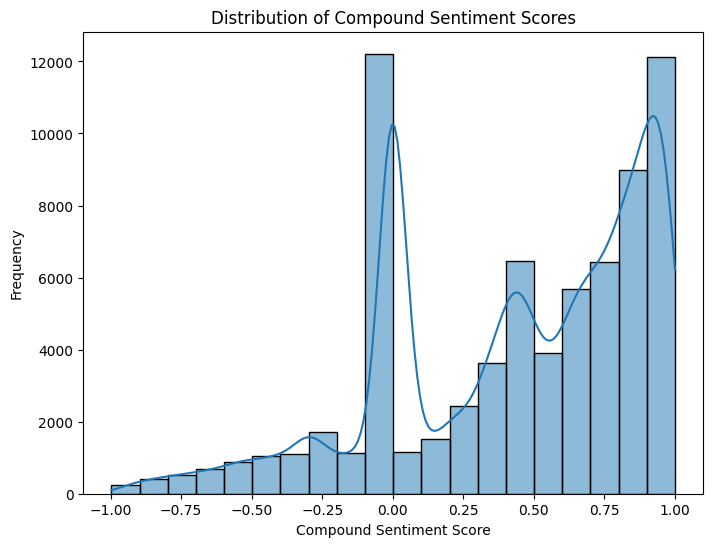

In [ ]:
# Histogram of Compound Sentiment Scores
plt.figure(figsize=(8, 6))
sns.histplot(sentiment['compound'], bins=20, kde=True)
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Compound Sentiment Scores')
plt.show()

In [ ]:
# Merge the cities
sentiment['city'] = sentiment['city'] + ', ' + sentiment['state']
sentiment.head(5)

,state,city,message,compound,negative,neutral,positive
0,Alabama,"Birmingham, Alabama","For higher end: Highlands Bar & Grill, Bottega...",0.9549,0.000,0.894,0.106
1,Alabama,"Birmingham, Alabama",This is awesome! Thank you!,0.8011,0.000,0.295,0.705
2,Alabama,"Birmingham, Alabama",dbh2- great list! My daughter used to live in ...,0.6229,0.075,0.705,0.220
3,Alabama,"Birmingham, Alabama",Tripadvisor staff removed this post because it...,-0.4767,0.154,0.846,0.000
4,Alabama,"Birmingham, Alabama",There is a nice art museum downtown.,0.4215,0.000,0.641,0.359


### Plotting and recommending

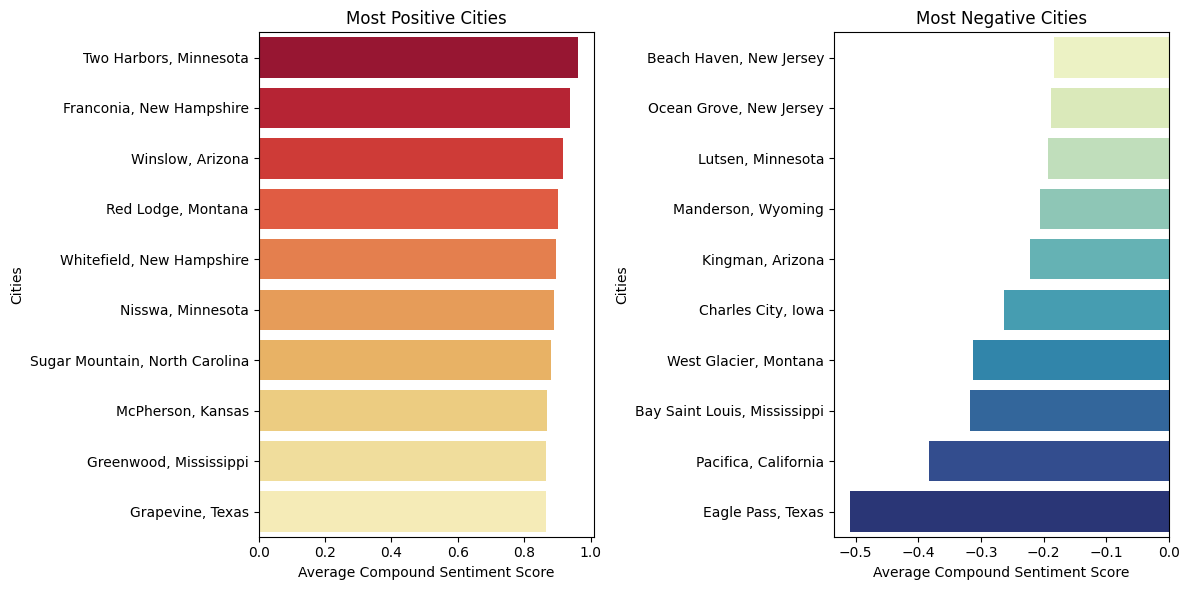

In [ ]:
# Calculate the average compound sentiment score for each product
average_sentiment_by_cities = sentiment.groupby(['city'])['compound'].mean().reset_index()

# Sort the products by average sentiment score in descending order
average_sentiment_by_cities = average_sentiment_by_cities.sort_values(by='compound', ascending=False)

# Split the products into most positive and most negative (top 5 each)
most_positive_cities = average_sentiment_by_cities.head(10)
most_negative_cities = average_sentiment_by_cities.tail(10)

# Create bar plots for the most positive and most negative products
plt.figure(figsize=(12, 6))

# Most Positive Products
plt.subplot(1, 2, 1)
sns.barplot(data=most_positive_cities, x='compound', y='city', palette=sns.color_palette("YlOrRd", len(most_positive_cities))[::-1])
plt.xlabel('Average Compound Sentiment Score')
plt.ylabel('Cities')
plt.title('Most Positive Cities')

# Most Negative Products
plt.subplot(1, 2, 2)
sns.barplot(data=most_negative_cities, x='compound', y='city', palette=sns.color_palette("YlGnBu", len(most_negative_cities)))
plt.xlabel('Average Compound Sentiment Score')
plt.ylabel('Cities')
plt.title('Most Negative Cities')

plt.tight_layout()
plt.show()

## Similarity Analysis and MDS

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools


from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns


from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS

import spacy
import numpy as np


from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')


### Data Preprocessing

In [ ]:
data = pd.read_csv("All_Comments.csv")
data.head()

,Unnamed: 0,state,city,title,post,message
0,0,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,"For higher end: Highlands Bar & Grill, Bottega..."
1,1,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,This is awesome! Thank you!
2,2,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,dbh2- great list! My daughter used to live in ...
3,3,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,Tripadvisor staff removed this post because it...
4,4,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,There is a nice art museum downtown.


In [ ]:
# Remove the first column and the row that contains useless data
df = data.drop(columns=['Unnamed: 0'])
df = df[~df['state'].str.contains('probably the State\)')]

# Reset the index to avoid gaps in the index
df.reset_index(drop=True, inplace=True)

# Group messages by state and combine them into a single "big message" per state
state_messages = df.groupby('state')['message'].apply(' '.join).reset_index()
state_messages.head(5)


,state,message
0,Alabama,"For higher end: Highlands Bar & Grill, Bottega..."
1,Alaska,Thanks for the heads up Scott! In your opinion...
2,Arizona,http://www.tripadvisor.com/ShowTopic-g31352-i1...
3,Arkansas,Hot Springs National Park is the great downtow...
4,California,It can be nice or it can have its first snows....


### Overall Similarity using doc2vec


In [ ]:
# Tokenize and preprocess the messages
def preprocess_text(text):
    # Tokenization and preprocessing steps (modify as needed)
    words = word_tokenize(text.lower())
    # You can add more preprocessing steps here, e.g., remove punctuation, stopwords
    return words


In [ ]:
# Create TaggedDocument objects
tagged_data = [TaggedDocument(words=preprocess_text(row['message']), tags=[row['state']]) for idx, row in state_messages.iterrows()]

# Initialize and train the Doc2Vec model
#model = Doc2Vec(vector_size=2000, workers=8, min_count=3, epochs=30)
model = Doc2Vec(vector_size=3000, workers=8, min_count=3, epochs=30)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Calculate similarity between states
similarity_df3 = pd.DataFrame(columns=state_messages['state'], index=state_messages['state'])

for state1 in state_messages['state']:
    for state2 in state_messages['state']:
        sim = model.dv.similarity(state1, state2)
        similarity_df3.loc[state1, state2] = sim

# Print the similarity DataFrame
similarity_df3.head(3)


state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
state,,,,,,,,,,,,,,,,,,,,,
Alabama,1.0,0.193721,0.107305,0.271231,0.205477,0.16509,0.093512,0.252053,0.060153,0.229487,...,0.097144,0.25841,0.216091,0.038425,0.107493,0.265919,0.057351,0.112719,0.133842,0.159127
Alaska,0.193721,1.0,0.147183,0.140633,0.230918,0.220079,0.10391,0.142944,0.181057,0.172553,...,0.221171,0.18401,0.192753,0.236392,0.193745,0.200496,0.311233,0.154706,0.187028,0.380606
Arizona,0.107305,0.147183,1.0,0.196367,0.242843,0.2798,-0.025071,-0.027445,0.198221,0.135866,...,0.258209,0.131369,0.113269,0.509797,0.121564,0.141031,0.111449,0.253555,0.108567,0.334348


/Users/zihaozhu/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


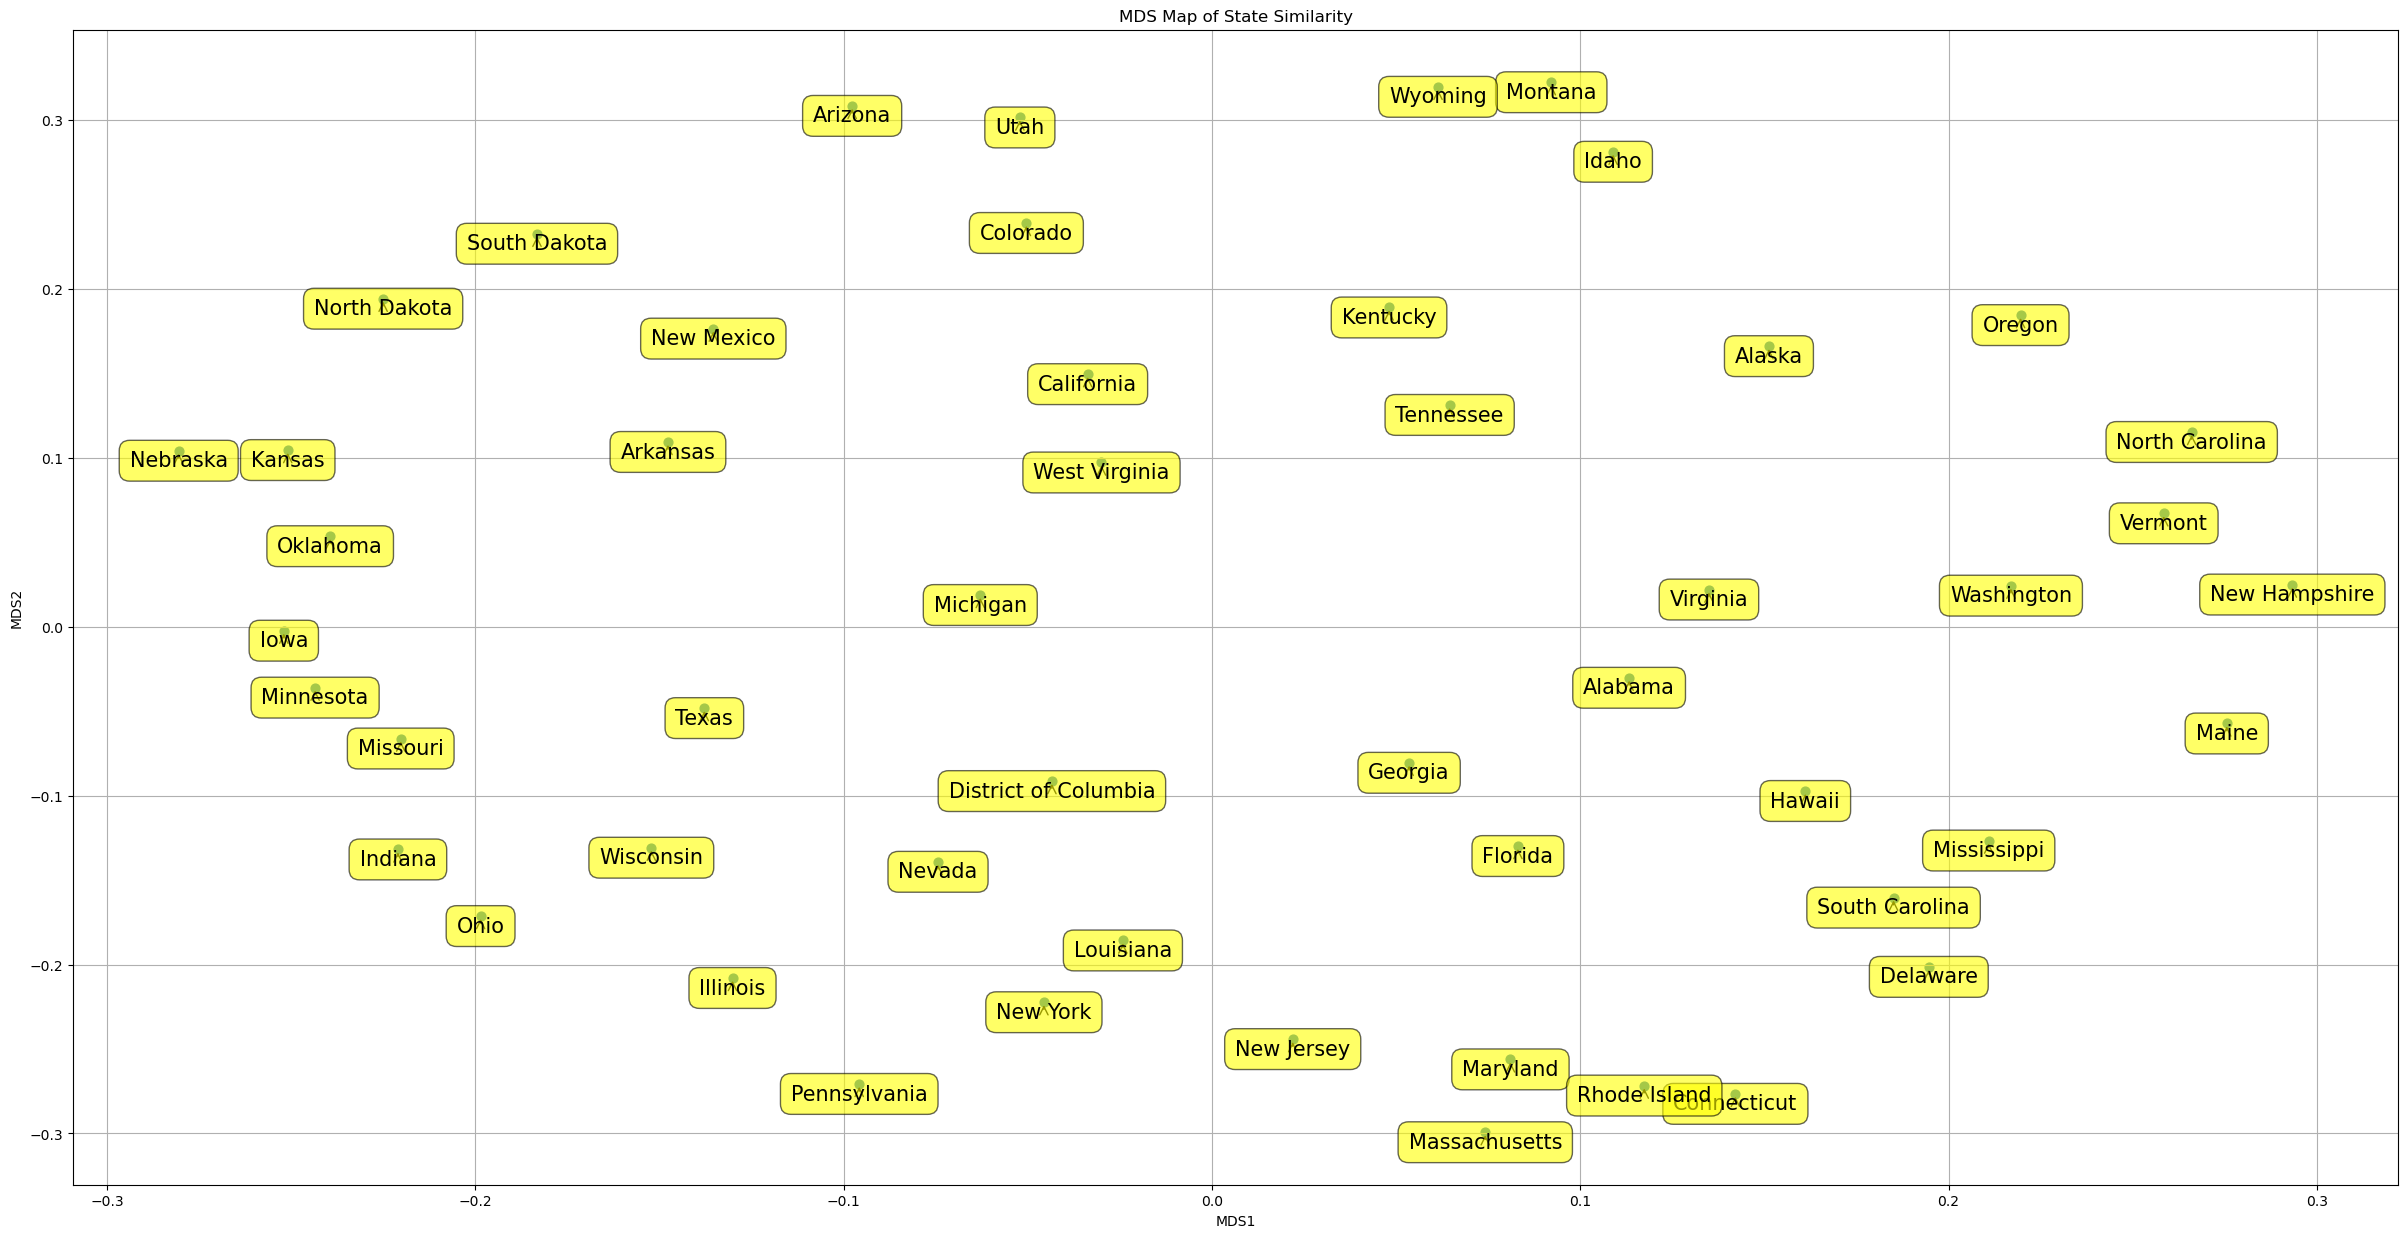

In [ ]:
# Calculate pairwise distances from the similarity scores
pairwise_dist = pairwise_distances(similarity_df3, metric='cosine')

# Apply MDS to reduce dimensions to 2D
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_coordinates = mds.fit_transform(pairwise_dist)

# Create a DataFrame for the MDS coordinates
mds_df = pd.DataFrame(mds_coordinates, columns=["MDS1", "MDS2"], index=similarity_df3.index)

# Plot
plt.figure(figsize=(30, 15))
plt.scatter(mds_df['MDS1'], mds_df['MDS2'], marker='o', s=40)

for state, (x, y) in mds_df.iterrows():
    plt.annotate(state, (x, y), fontsize=15, ha='center', va='top',

                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.6),
                 arrowprops={'arrowstyle': '->','connectionstyle':"angle3,angleA=90,angleB=0"})

plt.title("MDS Map of State Similarity")
plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.grid(True)
plt.show()

### Subset - Find Similarity in Terms of Food

In [ ]:
food_words = ["restaurant", "food", "menu", "dish", "cuisine", "chef", "eatery", "dining", "meal"]
food_df = df[df['post'].str.contains('|'.join(food_words), case=False) | df['message'].str.contains('|'.join(food_words), case=False)]
len(food_df)

19857

In [ ]:
filter_state_messages = food_df.groupby('state')['message'].apply(' '.join).reset_index()
filter_state_messages.head(5)

,state,message
0,Alabama,"For higher end: Highlands Bar & Grill, Bottega..."
1,Alaska,Re: The Taku Glacier tour in Juneau......we di...
2,Arizona,I took 93 S to 40 W to Kingman. I had heard ab...
3,Arkansas,Hot Springs National Park is the great downtow...
4,California,Fun trip - thanks for your trip report. Enjoye...


In [ ]:
# Create TaggedDocument objects
tagged_data = [TaggedDocument(words=preprocess_text(row['message']), tags=[row['state']]) for idx, row in filter_state_messages.iterrows()]

# Initialize and train the Doc2Vec model

model = Doc2Vec(vector_size=3000, workers=8, min_count=3, epochs=30)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Calculate similarity between states
similarity_df4 = pd.DataFrame(columns=filter_state_messages['state'], index=filter_state_messages['state'])

for state1 in filter_state_messages['state']:
    for state2 in filter_state_messages['state']:
        sim = model.dv.similarity(state1, state2)
        similarity_df4.loc[state1, state2] = sim

# Print the similarity DataFrame
similarity_df4.head(3)


state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
state,,,,,,,,,,,,,,,,,,,,,
Alabama,1.0,0.087474,0.075314,0.441929,0.120656,0.045723,0.072856,0.1839,0.059253,0.242708,...,0.108476,0.127324,0.144918,0.120031,0.11597,0.161932,0.045152,0.111127,0.166231,0.042616
Alaska,0.087474,1.0,0.096047,0.203803,0.241234,0.153774,0.115426,0.00567,0.013259,0.101121,...,0.3076,0.098376,0.163869,0.104035,0.216101,0.139389,0.277637,0.216767,0.160327,0.330078
Arizona,0.075314,0.096047,1.0,0.124869,0.136397,0.20448,-0.036499,-0.017304,0.129536,0.03429,...,0.194111,0.096067,0.075598,0.421573,0.152328,0.137889,0.083048,0.200795,0.030461,0.241467


/Users/zihaozhu/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


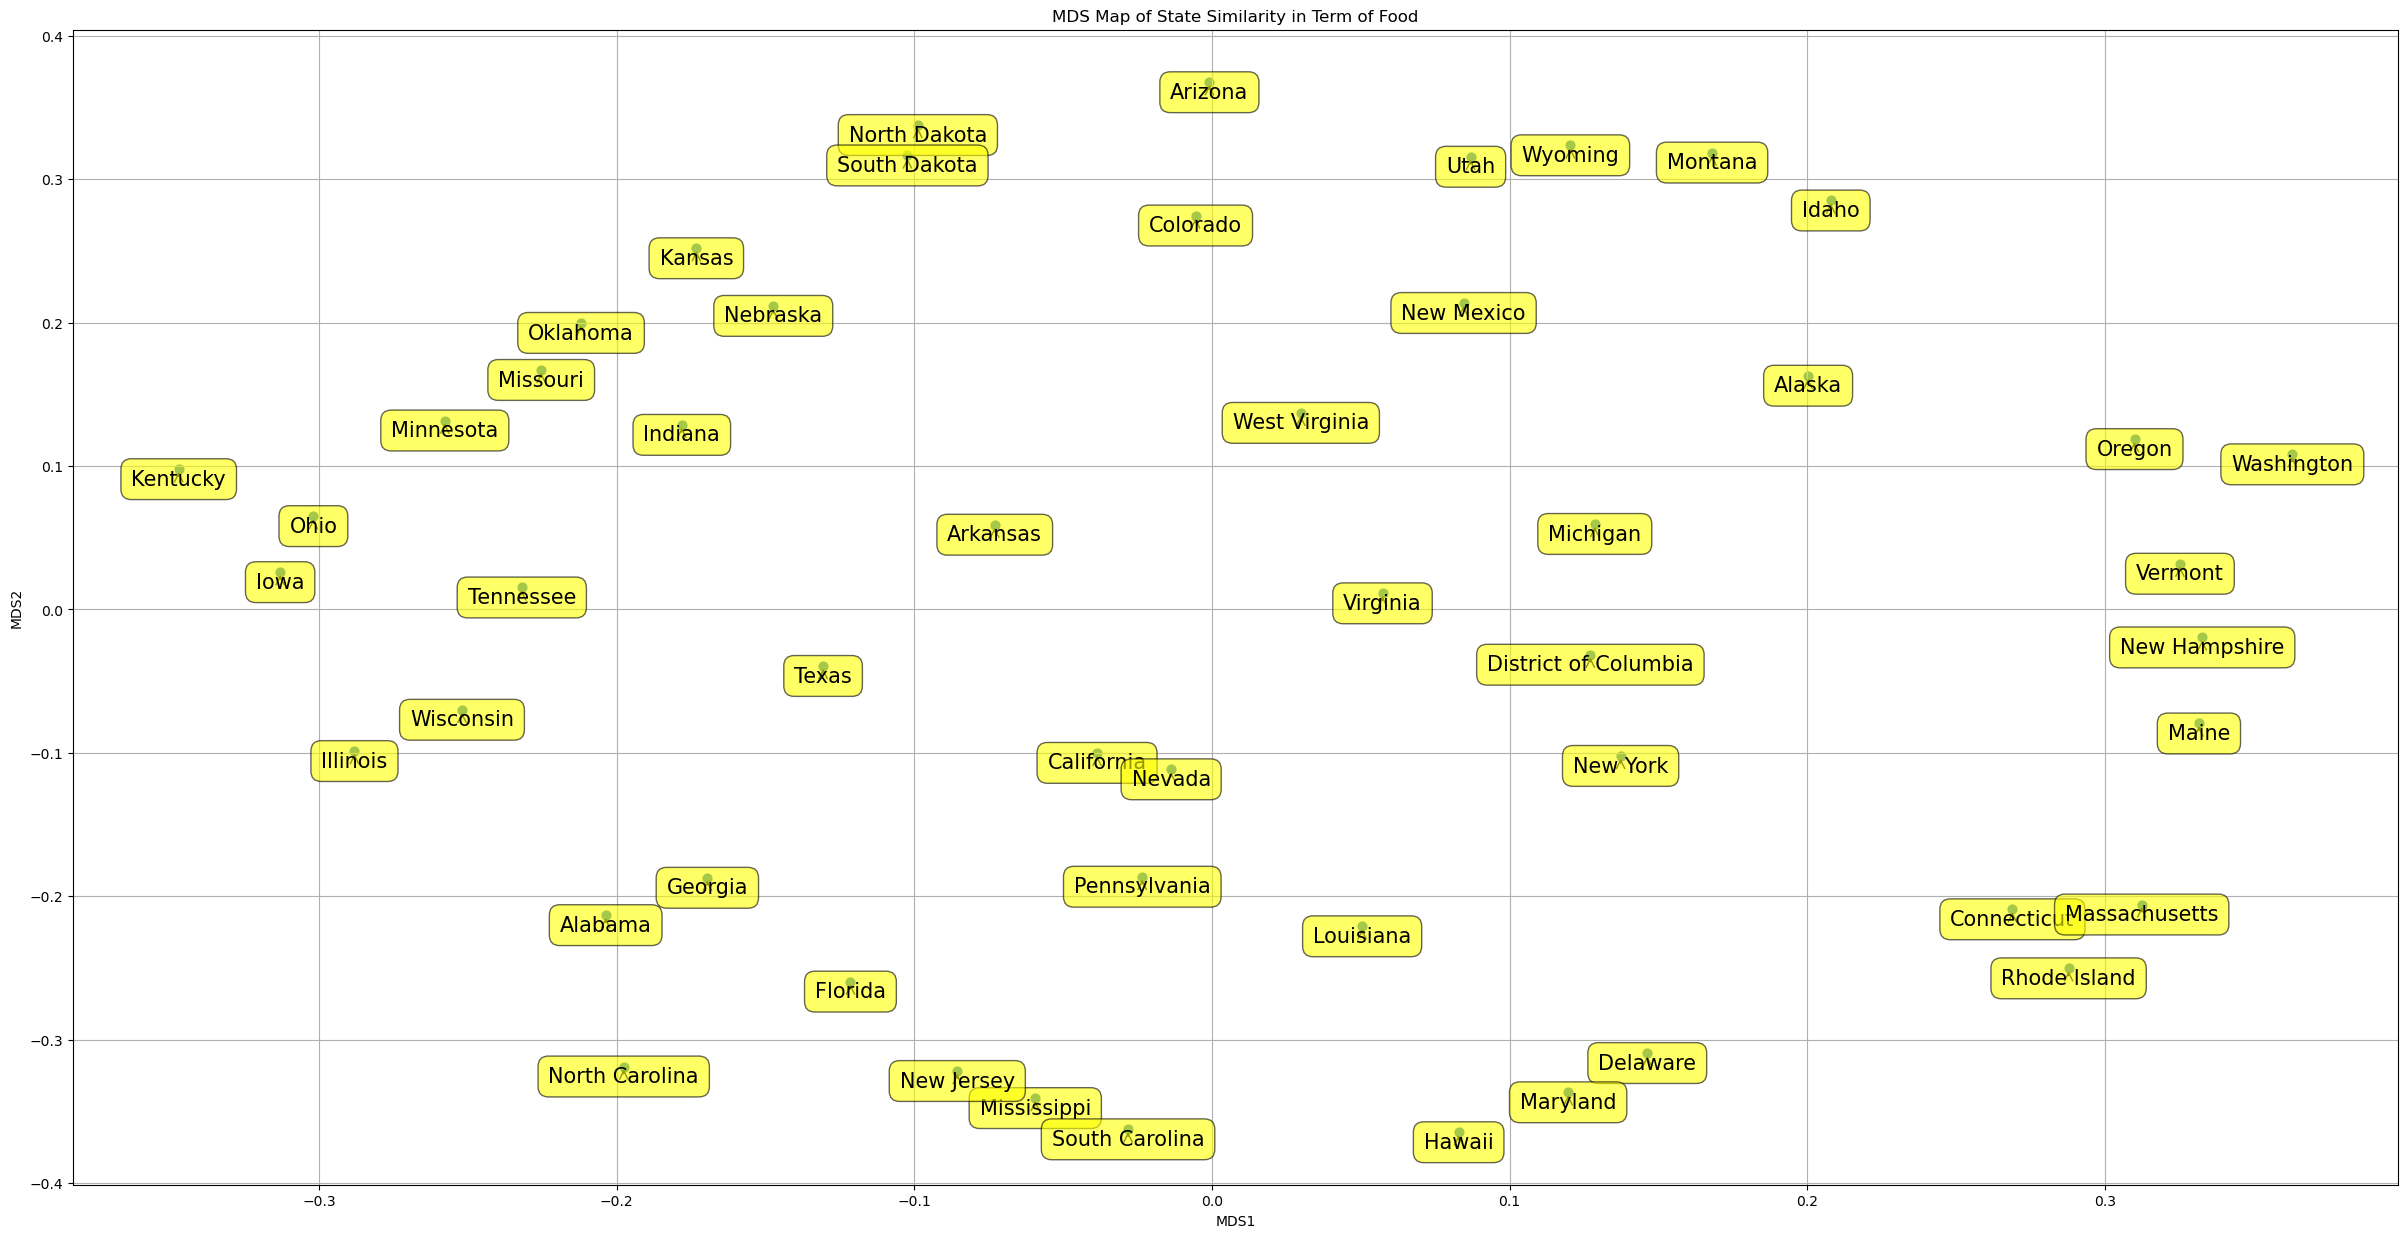

In [ ]:
# Calculate pairwise distances from the similarity scores
pairwise_dist = pairwise_distances(similarity_df4, metric='cosine')

# Apply MDS to reduce dimensions to 2D
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_coordinates = mds.fit_transform(pairwise_dist)

# Create a DataFrame for the MDS coordinates
mds_df = pd.DataFrame(mds_coordinates, columns=["MDS1", "MDS2"], index=similarity_df4.index)

# Plot
plt.figure(figsize=(30, 15))
plt.scatter(mds_df['MDS1'], mds_df['MDS2'], marker='o', s=40)

for state, (x, y) in mds_df.iterrows():
    plt.annotate(state, (x, y), fontsize=15, ha='center', va='top',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.6),
                 arrowprops={'arrowstyle': '->','connectionstyle':"angle3,angleA=90,angleB=0"})

plt.title("MDS Map of State Similarity in Term of Food")
plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.grid(True)
plt.show()

### What About Weather?

In [ ]:
weather_words = ["cold", "humid", "hot", "temperature", "snow", "rain", "freezing", "chilling", "windy","warm"]
weather_df = df[df['post'].str.contains('|'.join(weather_words), case=False) | df['message'].str.contains('|'.join(weather_words), case=False)]
len(weather_df)

29270

In [ ]:
filter_state_messages2 = weather_df.groupby('state')['message'].apply(' '.join).reset_index()
filter_state_messages2.head(5)

,state,message
0,Alabama,"For higher end: Highlands Bar & Grill, Bottega..."
1,Alaska,LOL good luck with that. I'm certain 99% of po...
2,Arizona,Tucson is surrounded by 4 mountain ranges with...
3,Arkansas,Hot Springs National Park is the great downtow...
4,California,It can be nice or it can have its first snows....


In [ ]:
# Create TaggedDocument objects
tagged_data = [TaggedDocument(words=preprocess_text(row['message']), tags=[row['state']]) for idx, row in filter_state_messages2.iterrows()]

# Initialize and train the Doc2Vec model

model = Doc2Vec(vector_size=3000, workers=8, min_count=3, epochs=30)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

# Calculate similarity between states
similarity_df5 = pd.DataFrame(columns=filter_state_messages2['state'], index=filter_state_messages2['state'])

for state1 in filter_state_messages2['state']:
    for state2 in filter_state_messages2['state']:
        sim = model.dv.similarity(state1, state2)
        similarity_df5.loc[state1, state2] = sim

# Print the similarity DataFrame
similarity_df5.head(3)


state,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
state,,,,,,,,,,,,,,,,,,,,,
Alabama,1.0,0.066936,0.141937,0.261769,0.161055,0.149764,0.070903,0.247211,0.063529,0.189584,...,0.126326,0.262579,0.217962,0.07745,0.05783,0.184319,0.079253,0.143933,0.14357,0.048248
Alaska,0.066936,1.0,0.114772,0.109532,0.160319,0.187669,0.012167,0.045182,0.055701,0.203496,...,0.224892,0.124287,0.127806,0.199245,0.189386,0.172131,0.30976,0.167005,0.147203,0.29148
Arizona,0.141937,0.114772,1.0,0.080568,0.205148,0.180456,-0.034235,-0.004077,0.142952,0.120262,...,0.224488,0.208671,0.050121,0.451666,0.209487,0.103323,0.076377,0.166676,0.059286,0.239998


/Users/zihaozhu/anaconda3/lib/python3.11/site-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


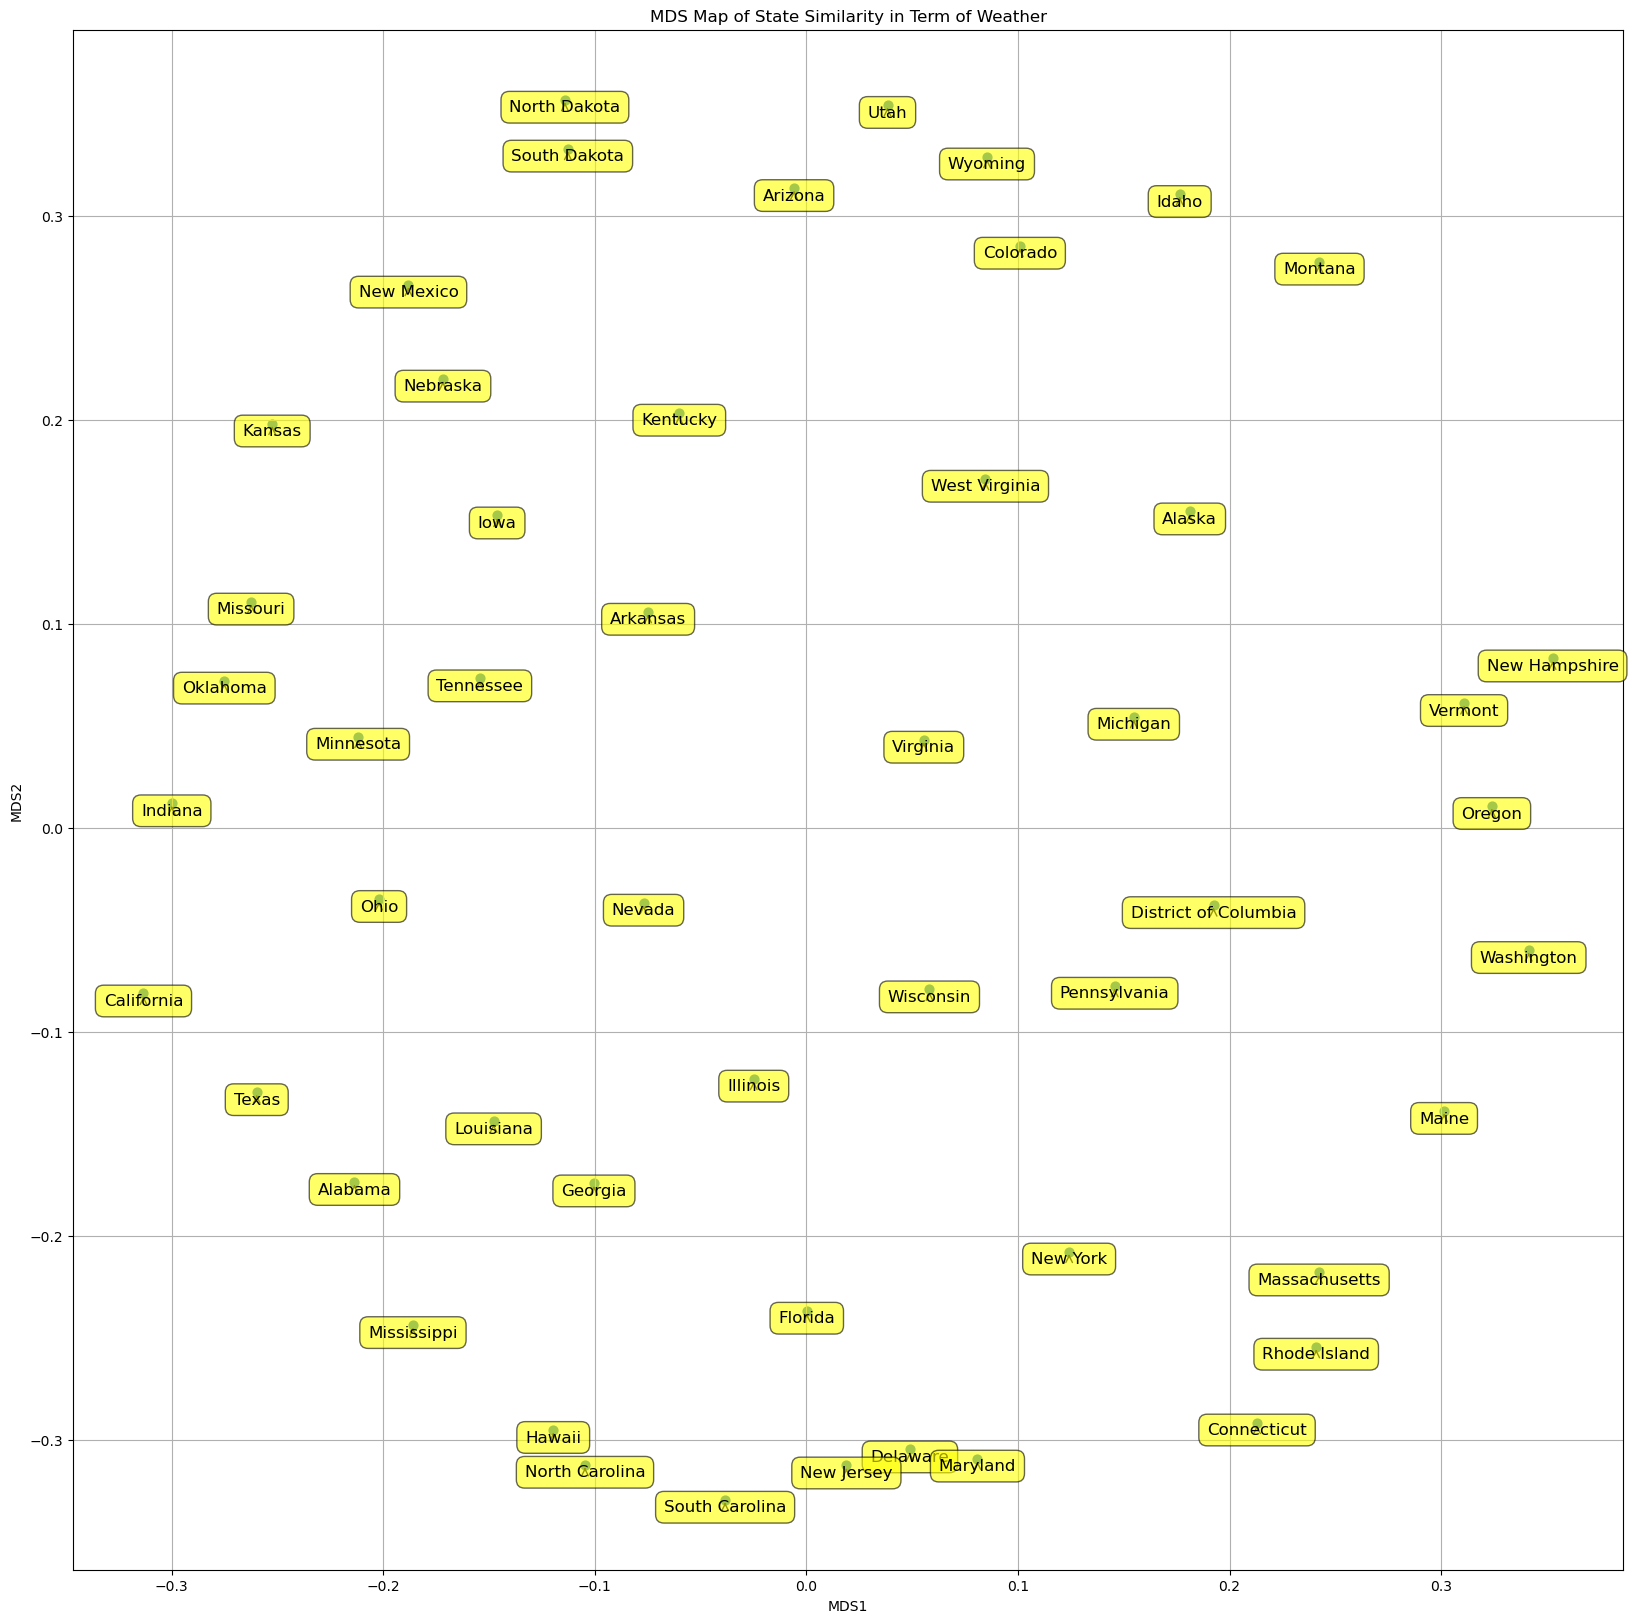

In [ ]:
# Calculate pairwise distances from the similarity scores
pairwise_dist = pairwise_distances(similarity_df5, metric='cosine')

# Apply MDS to reduce dimensions to 2D
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_coordinates = mds.fit_transform(pairwise_dist)

# Create a DataFrame for the MDS coordinates
mds_df = pd.DataFrame(mds_coordinates, columns=["MDS1", "MDS2"], index=similarity_df5.index)

# Plot
plt.figure(figsize=(20, 20))
plt.scatter(mds_df['MDS1'], mds_df['MDS2'], marker='o', s=40)

for state, (x, y) in mds_df.iterrows():
    plt.annotate(state, (x, y), fontsize=12, ha='center', va='top',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.6),
                 arrowprops={'arrowstyle': '->','connectionstyle':"angle3,angleA=90,angleB=0"})

plt.title("MDS Map of State Similarity in Term of Weather")
plt.xlabel("MDS1")
plt.ylabel("MDS2")
plt.grid(True)
plt.show()

## Lift Analysis

In [ ]:
import pandas as pd
import spacy
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data = pd.read_csv("All_Comments.csv")
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,state,city,title,post,message
0,0,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,"For higher end: Highlands Bar & Grill, Bottega..."
1,1,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,This is awesome! Thank you!
2,2,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,dbh2- great list! My daughter used to live in ...
3,3,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,Tripadvisor staff removed this post because it...
4,4,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,There is a nice art museum downtown.


In [ ]:
# Load SpaCy model
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser'])

# GPE: Countries, cities, states.
def extract_post_features(texts):
    docs = nlp.pipe(texts)
    features_list = [[ent.text for ent in doc.ents if ent.label_ in ['GPE']] for doc in docs]
    return features_list

texts = data['post'].astype(str).tolist()
features_list = extract_post_features(texts)
data['post_features'] = features_list

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from collections import Counter

# Flatten the list of lists of post features
all_post_features = [feature for sublist in data['post_features'].dropna() for feature in sublist]

# Count the frequency of each feature
feature_counts = Counter(all_post_features)

# Get the 5 most common features
post_top_features = [item[0] for item in feature_counts.most_common(5)]

print(post_top_features)

['Boston', 'Chicago', 'Portland', 'Seattle', 'Yellowstone']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['tagger', 'parser'])

# Get unique state and city names to be excluded
exclude_names = set(data['state'].unique().tolist() + data['city'].unique().tolist())

# Some interested NLP feature labels
'''
Label Definitions:
ORG: Companies, agencies, institutions, etc.
FAC: Buildings, airports, highways, bridges, etc.
PRODUCT: Objects, vehicles, foods, etc. (Not services.)
LOC: Non-GPE locations, mountain ranges, bodies of water.
'''
feature_label = ['ORG', 'FAC', 'PRODUCT', 'LOC']

# Define the function to extract non location features based on feature_label
def extract_message_features(texts,feature_label):
    docs = nlp.pipe(texts)
    features_list = [[ent.text for ent in doc.ents if ent.label_ in [feature_label] and ent.text not in exclude_names] for doc in docs]
    return features_list

# Extract all features for each label
message_texts = data['message'].astype(str).tolist()

for label in feature_label:
  col_name = f"message_features_{label}"
  data[col_name] = extract_message_features(message_texts, label)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)
/usr/local/lib/python3.10/dist-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warn

In [ ]:
# Prepare data for association analysis
data['all_features'] = data.apply(lambda x: x['post_features'] + x['message_features_ORG'] + x['message_features_FAC'] + x['message_features_PRODUCT'] + x['message_features_LOC'], axis=1)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,state,city,title,post,message,message_features_ORG,message_features_FAC,message_features_PRODUCT,message_features_LOC,post_features
0,0,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,"For higher end: Highlands Bar & Grill, Bottega...","[Hot & Hot Fish Club, The Smoke House]",[],"[Oysters, Ocean]",[West],[Birmingham]
1,1,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,This is awesome! Thank you!,[],[],[],[],[Birmingham]
2,2,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,dbh2- great list! My daughter used to live in ...,[],[],[],[],[Birmingham]
3,3,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,Tripadvisor staff removed this post because it...,[],[],[],[],[Birmingham]
4,4,Alabama,Birmingham,First Visit,Hello! I will be in Birmingham on business in ...,There is a nice art museum downtown.,[],[],[],[],[Birmingham]


In [ ]:
# Lift calculation formula
def calculate_lift(x, y, data):
    count_x = 0
    count_y = 0
    count_x_y = 0
    N = len(data)

    if x==y:
        return float(1)

    for i in data:
      if x in i:
        count_x += 1
      if y in i:
        count_y += 1
      if (x in i) and (y in i):
        count_x_y += 1

    if count_x == 0:
        return (float(N)*count_x_y)/(count_y)
    elif count_y == 0:
        return (float(N)*count_x_y)/(count_x)
    else:
        return (float(N)*count_x_y)/(count_x*count_y)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Calculate the lift for every combination

def populate_lift_matrix(feature_label):

  col_name = f"message_features_{feature_label}"

  all_message_features = [feature for sublist in data[col_name].dropna() for feature in sublist]

  # Count the frequency of each feature
  feature_counts = Counter(all_message_features)

  # Get the 10 most common features
  message_top_features = [item[0] for item in feature_counts.most_common(100)]

  lift_feature = pd.DataFrame(columns=['location','feature','lift'])

  row = 0

  for post in post_top_features:

    for feature in message_top_features:

        row += 1
        lift = calculate_lift(str(post), str(feature), data['all_features'])
        lift_feature.loc[row] = [post, feature, lift]

  lift_matrix_feature = lift_feature.pivot(index='location', columns='feature')

  return lift_matrix_feature

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
for label in feature_label:

  print(f"\n Output for {label} features:")

  matrix = populate_lift_matrix(label)

  top_features_dict = {}

  # Iterate through the index (locations) of the DataFrame
  for location in matrix.index:
      # Use nlargest to get the top 3 features for the current location
      top_features = matrix.loc[location]['lift'].nlargest(5).index.tolist()
      # Assign the top features to the current location in the dictionary
      top_features_dict[location] = top_features


  df = pd.DataFrame(top_features_dict)

  display(df)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



 Output for ORG features:


,Boston,Chicago,Portland,Seattle,Yellowstone
0,NH,Metra,PDX,Bainbridge,Grand Tetons
1,Acadia,O'Hare,Acadia,Capitol Hill,Tetons
2,MV,CTA,I-5,I-5,Canyon
3,CT,ORD,Cadillac,Tetons,Teton
4,I-95,Midway,NH,Talkeetna,YNP



 Output for FAC features:


,Boston,Chicago,Portland,Seattle,Yellowstone
0,the Freedom Trail,Millennium Park,Mt Hood,Port Townsend,Grand Teton
1,Logan Airport,Wrigley Field,the Old Port,Pioneer Square,Lake Hotel
2,Harvard Square,Lincoln Park,Crater Lake,the Space Needle,Fishing Bridge
3,Fenway Park,State Street,Bar Harbor/Acadia,Seattle Center,Old Faithful
4,Bar Harbor/Acadia,Cedar Pass,Depoe Bay,Highway 101,Grand Teton Park



 Output for PRODUCT features:


,Boston,Chicago,Portland,Seattle,Yellowstone
0,I-93,RiverWalk,I-84,the Hoh RF,Canyon
1,Seaport,I-88,Cedars,LightRail,Grinnell Glacier
2,Flume,T2,I-5,I-5,Sundance
3,the USS Constitution,T5,Rte 1,I-20,Discovery
4,I-89,Aurora,the Hoh RF,Discovery,Crown



 Output for LOC features:


,Boston,Chicago,Portland,Seattle,Yellowstone
0,North Station,River North,Mt. Hood,Mt. Rainier,Hayden Valley
1,Back Bay,Hyde Park,Southwest Harbor,the Olympic Peninsula,Lamar Valley
2,the North End,Lake Michigan,the Oregon Coast,Capitol Hill,Canyon
3,South Station,River,Ellsworth,Forks,the South Rim
4,Cape,I-90,Mt. Rainier,Paradise,Caribbean
